# **Modeling and Prediction of Silica Content in Iron Ore via Froth Flotation Process**
*An application of machine learning techniques for predicting post-flotation silica concentration in iron ore beneficiation.*

### ***About Froth Flotation:***

**Froth flotation** is a process for **selectively separating hydrophobic materials from hydrophilic**. This is used in mineral processing, paper recycling and waste-water treatment industries. Historically this was **first used in the mining industry**, where it was one of the great enabling technologies of the 20th century. It has been described as "**the single most important operation used for the recovery and upgrading of sulfide ores**". The development of froth flotation has improved the recovery of valuable minerals, such as copper- and lead-bearing minerals. **Along with mechanized mining, it has allowed the economic recovery of valuable metals from much lower-grade ore than previously possible.

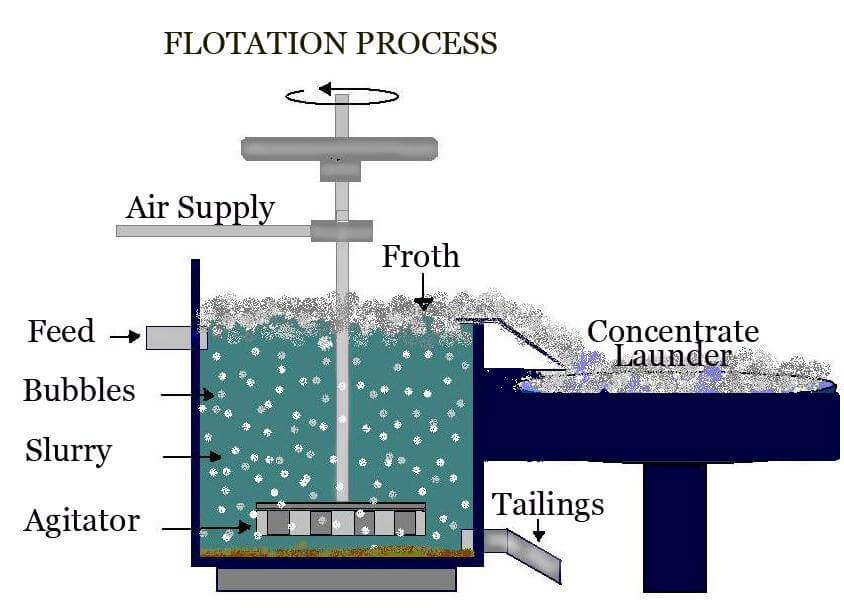


# **Application of Froth Flotation in Iron Ore Mining**

Froth flotation is a well-established beneficiation process used widely in the mining industry, particularly in iron ore processing, to enhance ore quality by removing impurities. While flotation is more traditionally associated with sulfide ores (like copper and lead), it also plays a significant role in the purification of low-grade iron ores, especially siliceous or phosphorus-rich varieties.

Iron ores, especially low-grade varieties, often contain high levels of impurities like:

*  Silica (SiO₂)

*  Alumina (Al₂O₃)

*  Phosphorus (P)



These impurities lower the efficiency of blast furnaces and increase slag volume, so removing them is crucial.



*DataSource: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process*

**Project Objective**: To predict % silica in product after flotation process. The expected outcomes for this project are as follows:

1.   Improve reliability of process.
2.   Reduce waste water from process leading to environment friendly.
3.   Reduce cost of laboratory testing as soft sensor.



**Major Conclusion:**



*   Various Machine Learning based Regression models where tested and compared on various evaluation metrics.
*   Out of them, **XGBoost** was selected as the best fit for this purpose.
*   The performance of the selected model is:
    *  Root Mean Square Error: 0.246
    *  R Square value : 0.951.


In [1]:
#import essential libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/ML_Froth_Floatation_Project/MiningProcess_Flotation_Plant_Database.csv', decimal=",", parse_dates=["date"], infer_datetime_format=True).drop_duplicates()

/tmp/ipython-input-3-1791814603.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/drive/My Drive/ML_Froth_Floatation_Project/MiningProcess_Flotation_Plant_Database.csv', decimal=",", parse_dates=["date"], infer_datetime_format=True).drop_duplicates()


## *Performing Data Preprocessing and Analysis.*

In [4]:
df.head()     #getting a brief overview of the dataset.

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [5]:
df.shape

(736282, 24)

In [6]:
#dropping columns with null entries.

df = df.dropna()
df.shape

(736282, 24)

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736282 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          736282 non-null  datetime64[ns]
 1   % Iron Feed                   736282 non-null  float64       
 2   % Silica Feed                 736282 non-null  float64       
 3   Starch Flow                   736282 non-null  float64       
 4   Amina Flow                    736282 non-null  float64       
 5   Ore Pulp Flow                 736282 non-null  float64       
 6   Ore Pulp pH                   736282 non-null  float64       
 7   Ore Pulp Density              736282 non-null  float64       
 8   Flotation Column 01 Air Flow  736282 non-null  float64       
 9   Flotation Column 02 Air Flow  736282 non-null  float64       
 10  Flotation Column 03 Air Flow  736282 non-null  float64       
 11  Flotation Column 0

In [8]:
df.describe()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,...,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,2017-06-16 02:30:44.009767936,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,...,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
min,2017-03-10 01:00:00,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,2017-05-04 21:00:00,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,...,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,2017-06-16 12:00:00,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,...,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,2017-07-29 09:00:00,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,...,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,2017-09-09 23:00:00,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000
std,NaN,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,...,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616


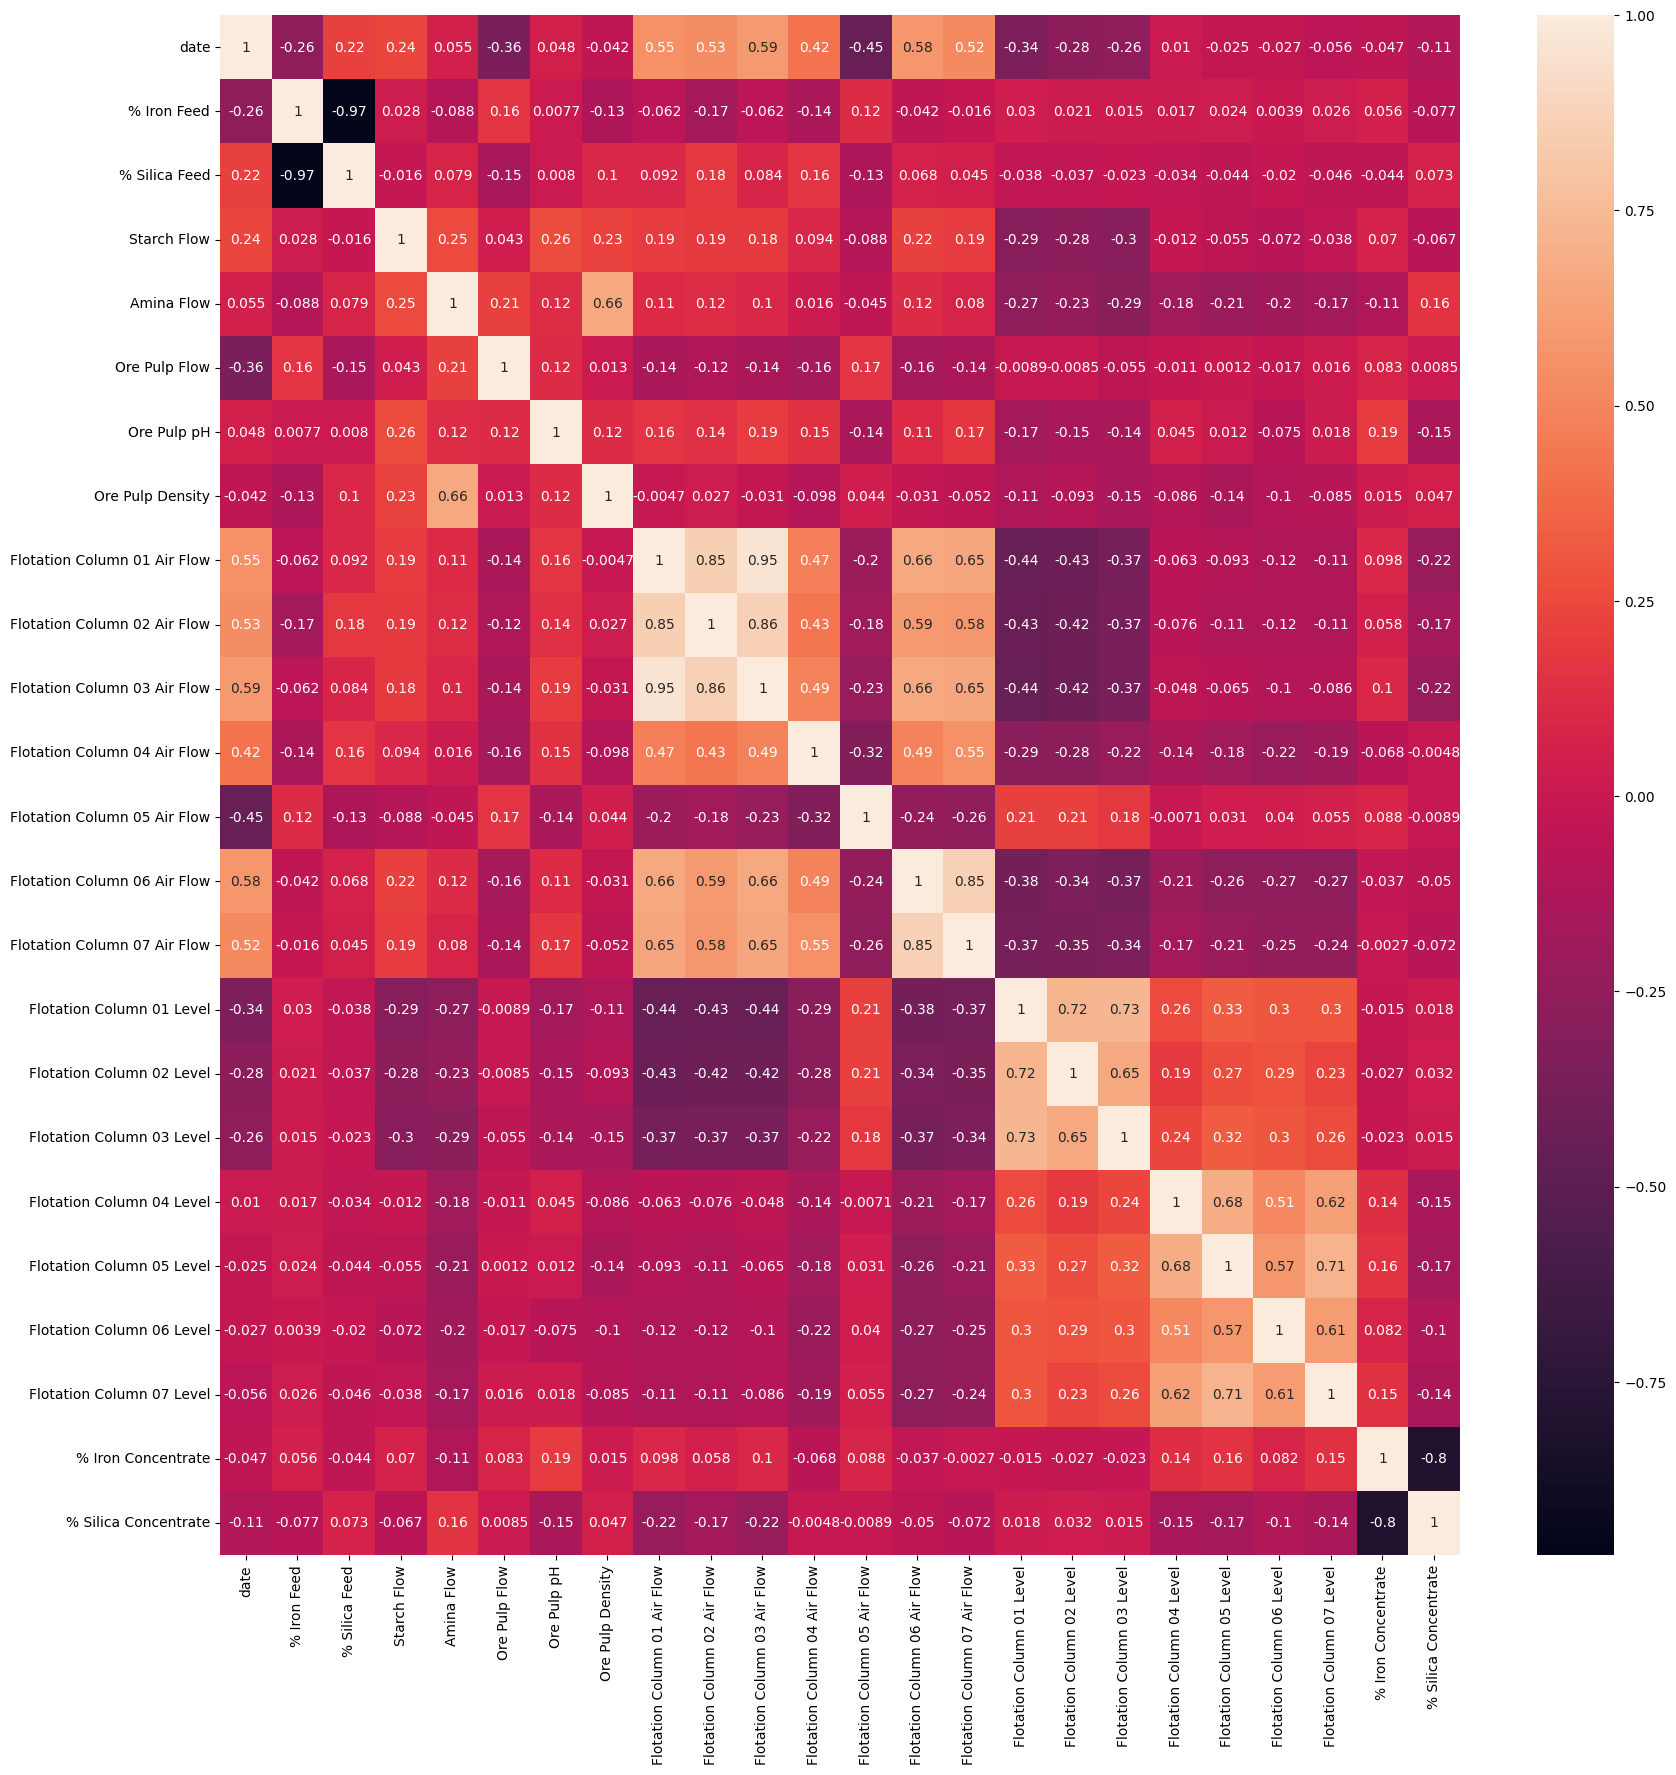

In [9]:
#Plotting a heatmap to obtain the correlation between different columns

plt.figure(figsize=(20,20))
p = sns.heatmap(df.corr(), annot = True)
plt.show()

From Correlation matrix, possible features realting with the label are as follows:



1.   % Iron Concentrate
2.   % Iron Feed
3.   % Silica Feed
4.   Amina Flow
5.   Ore Pulp pH
6.   Flotation Column 01 Air Flow
7. Flotation Column 02 Air Flow
8. Flotation Column 03 Air Flow
9. Flotation Column 04 Level
10. Flotation Column 05 Level
11. Flotation Column 06 Level
12. Flotation Column 07 Level






*Conclusion:*

The most significant feature relating with label is '% iron concentrate' in the proper so it is not proper if the model is built without % iron concentrate as feature.

*Action:*

Keep only the possible features and drop all other columns including 'date' column.

Feature vs label correlation plots.

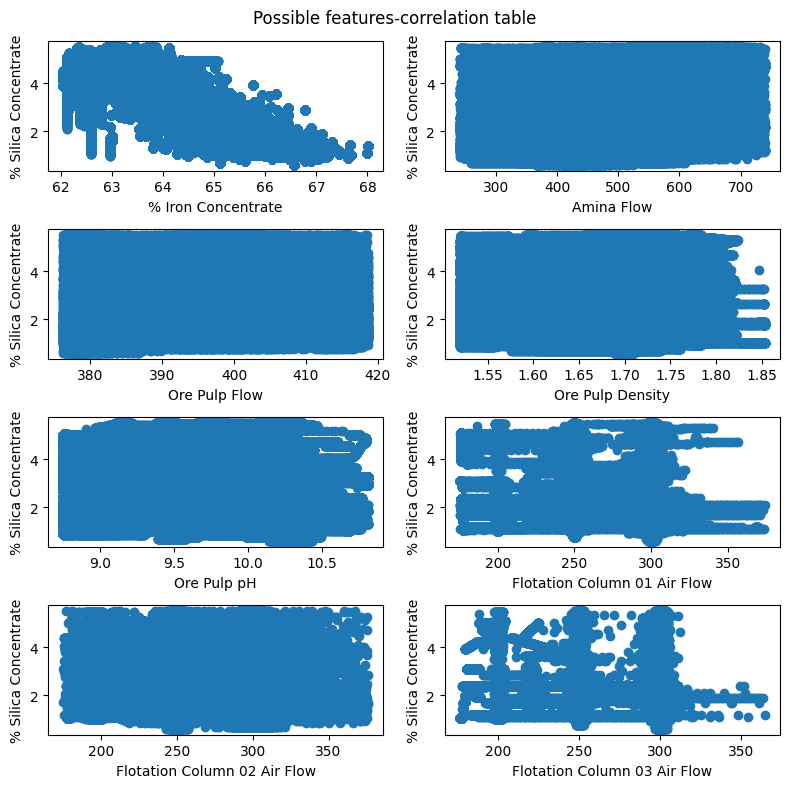

In [ ]:
fig, axs = plt.subplots(4,2, figsize=(8,8))
fig.suptitle("Possible features-correlation table")
axs[0,0].scatter(df['% Iron Concentrate'], df['% Silica Concentrate'])
axs[0,0].set_xlabel('% Iron Concentrate')
axs[0,0].set_ylabel('% Silica Concentrate')

axs[0,1].scatter(df['Amina Flow'], df['% Silica Concentrate'])
axs[0,1].set_xlabel('Amina Flow')
axs[0,1].set_ylabel('% Silica Concentrate')

axs[1,0].scatter(df['Ore Pulp Flow'], df['% Silica Concentrate'])
axs[1,0].set_xlabel('Ore Pulp Flow')
axs[1,0].set_ylabel('% Silica Concentrate')

axs[1,1].scatter(df['Ore Pulp Density'], df['% Silica Concentrate'])
axs[1,1].set_xlabel('Ore Pulp Density')
axs[1,1].set_ylabel('% Silica Concentrate')

axs[2,0].scatter(df['Ore Pulp pH'], df['% Silica Concentrate'])
axs[2,0].set_xlabel('Ore Pulp pH')
axs[2,0].set_ylabel('% Silica Concentrate')

axs[2,1].scatter(df['Flotation Column 01 Air Flow'], df['% Silica Concentrate'])
axs[2,1].set_xlabel('Flotation Column 01 Air Flow')
axs[2,1].set_ylabel('% Silica Concentrate')

axs[3,0].scatter(df['Flotation Column 02 Air Flow'], df['% Silica Concentrate'])
axs[3,0].set_xlabel('Flotation Column 02 Air Flow')
axs[3,0].set_ylabel('% Silica Concentrate')

axs[3,1].scatter(df['Flotation Column 03 Air Flow'], df['% Silica Concentrate'])
axs[3,1].set_xlabel('Flotation Column 03 Air Flow')
axs[3,1].set_ylabel('% Silica Concentrate')

plt.tight_layout()

In [10]:
df = df.drop(['date', 'Starch Flow', 'Ore Pulp Flow', 'Ore Pulp Density', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level'], axis=1)

In [11]:
df.head()

,% Iron Feed,% Silica Feed,Amina Flow,Ore Pulp pH,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,557.434,10.0664,249.214,253.235,250.576,443.558,502.255,446.370,523.344,66.91,1.31
1,55.2,16.98,563.965,10.0672,249.719,250.532,250.862,448.086,496.363,445.922,498.075,66.91,1.31
2,55.2,16.98,568.054,10.0680,249.741,247.874,250.313,449.688,484.411,447.826,458.567,66.91,1.31
3,55.2,16.98,568.665,10.0689,249.917,254.487,250.049,446.210,471.411,437.690,427.669,66.91,1.31
4,55.2,16.98,558.167,10.0697,250.203,252.136,249.895,453.670,462.598,443.682,425.679,66.91,1.31


In [12]:
df.columns

Index(['% Iron Feed', '% Silica Feed', 'Amina Flow', 'Ore Pulp pH',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Level',
       'Flotation Column 05 Level', 'Flotation Column 06 Level',
       'Flotation Column 07 Level', '% Iron Concentrate',
       '% Silica Concentrate'],
      dtype='object')

In [13]:
from sklearn.model_selection import train_test_split
X = df.drop('% Silica Concentrate', axis=1)
y = df['% Silica Concentrate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (589025, 12)
Shape of X_test: (147257, 12)
Shape of y_train: (589025,)
Shape of y_test: (147257,)


In [15]:
X_train

,% Iron Feed,% Silica Feed,Amina Flow,Ore Pulp pH,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
195954,51.30,24.52,477.792,10.12400,249.860,251.179,249.034,337.734,356.930,329.194,342.636,63.740000
660499,53.06,19.28,550.397,9.52659,299.321,295.866,298.452,410.657,328.833,421.932,301.693,65.770000
576340,51.34,23.16,422.775,9.83983,299.831,302.839,302.028,378.323,384.786,354.624,397.927,65.440000
229955,64.03,6.26,422.172,9.40286,249.575,249.789,249.390,340.965,339.674,346.608,336.231,65.450000
707324,54.27,16.60,476.304,9.52914,299.891,298.467,299.232,395.390,419.427,327.757,333.770,65.040000
...,...,...,...,...,...,...,...,...,...,...,...,...
259179,64.03,6.26,487.059,10.14220,298.389,293.560,300.367,384.003,361.865,353.413,417.116,65.270000
365844,64.48,3.85,561.712,9.65117,298.400,298.653,299.155,399.134,392.937,393.915,408.491,65.510000
131933,55.17,14.35,422.320,9.71187,250.054,252.527,251.215,358.603,335.011,417.478,301.636,62.131468
672326,58.81,7.44,537.044,9.26602,299.784,296.236,299.059,339.103,331.020,360.464,316.709,66.460000


In [16]:
# Normalizing the data.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [17]:
X_train_scaled

array([[-0.96734645,  1.4474308 , -0.11375683, ..., -1.1199513 ,
        -0.92188378, -1.17038141],
       [-0.6265335 ,  0.67862598,  0.68171997, ..., -0.08857041,
        -1.40400441,  0.64380465],
       [-0.9596007 ,  1.24789367, -0.71653553, ..., -0.83713287,
        -0.27080955,  0.34888771],
       ...,
       [-0.21794525, -0.04469612, -0.72152061, ..., -0.13810534,
        -1.40467561, -2.60790657],
       [ 0.48691788, -1.05852081,  0.53542148, ..., -0.77218361,
        -1.22718485,  1.26044918],
       [-0.53939383,  0.27368297,  0.27716132, ...,  0.02897218,
        -0.19921506,  0.77785781]])

In [18]:
#Storing metric values in a list for comparison.
MSE = []
RMSE = []
R2 = []
MAE = []

## **Training and comparing different Regression models.**
*Tracking different eval_metrics for selecting the best model for this problem.*

The models trained here are:


*   Linear Regression
*   Linear Regression with L1 regularization
*   Linear Regression with L2 regularization
*   Random Forest (Regression)
*   Extreme Gradient Boosting (XGBoost)


Linear Regression without regularization

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

reg0 = LinearRegression()
reg0.fit(X_train_scaled, y_train)
y_pred = reg0.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
MSE.append(mse)
rmse = root_mean_squared_error(y_test, y_pred)
RMSE.append(rmse)
mae = mean_absolute_error(y_test, y_pred)
MAE.append(mae)
r2 = r2_score(y_test, y_pred)
R2.append(r2)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.4110122444253201
Root Mean Squared Error: 0.6411023665728587
Mean Absolute Error: 0.49612208596004503
R2 Score: 0.6744428939326267


Linear Regression with L1 regularization

In [ ]:
from logging import root
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

reg1 = Lasso(alpha=0.01)
reg1.fit(X_train_scaled, y_train)
y_pred = reg1.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
MSE.append(mse)
rmse = root_mean_squared_error(y_test, y_pred)
RMSE.append(rmse)
mae = mean_absolute_error(y_test, y_pred)
MAE.append(mae)
r2 = r2_score(y_test, y_pred)
R2.append(r2)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.4130126930537679
Root Mean Squared Error: 0.642660635992098
Mean Absolute Error: 0.4969622783459994
R2 Score: 0.6728583662813288


Linear Regression with L2 regularization

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

reg2 = Ridge(alpha=0.1)
reg2.fit(X_train_scaled, y_train)

y_pred = reg2.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
MSE.append(mse)
rmse = root_mean_squared_error(y_test, y_pred)
RMSE.append(rmse)
mae = mean_absolute_error(y_test, y_pred)
MAE.append(mae)
r2 = r2_score(y_test, y_pred)
R2.append(r2)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.4110122443356955
Root Mean Squared Error: 0.6411023665029599
Mean Absolute Error: 0.49612208224621684
R2 Score: 0.6744428940036171


Using Random Forest Regressor.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

reg3 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1, verbose=1000)
reg3.fit(X_train_scaled, y_train)

y_pred = reg3.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
MSE.append(mse)
mae = mean_absolute_error(y_test, y_pred)
MAE.append(mae)
r2 = r2_score(y_test, y_pred)
R2.append(r2)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.2s

building tree 4 of 100[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.8s

building tree 5 of 100[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   26.4s

building tree 6 of 100
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   26.5s
building tree 7 of 100[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   37.4s

building tree 8 of 100
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   37.5s
building tree 9 of 100[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   48.9s

building tree 10 of 100[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   49.4s

building tree 11 of 100[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.0min

building tree 12 of 100[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.0min

building tree 13 of 

Using Extreme Gradient Boosting (XGBoost)

In [19]:
from string import octdigits
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

xgb_model = XGBRegressor(n_estimators=2000, reg_lambda=1, max_depth=6, learning_rate=0.05, random_state=42, n_jobs=-1)
xgb_model.fit(X_train_scaled, y_train,
              eval_set=[(X_test_scaled, y_test)], # Use X_test as validation for early stopping
              verbose=True # Set to True to see progress during training
             )

y_pred = xgb_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
MSE.append(mse)
rmse = root_mean_squared_error(y_test, y_pred)
RMSE.append(rmse)
mae = mean_absolute_error(y_test, y_pred)
MAE.append(mae)
r2 = r2_score(y_test, y_pred)
R2.append(r2)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

[0]	validation_0-rmse:1.08223
[1]	validation_0-rmse:1.04311
[2]	validation_0-rmse:1.00632
[3]	validation_0-rmse:0.97208
[4]	validation_0-rmse:0.93978
[5]	validation_0-rmse:0.90956
[6]	validation_0-rmse:0.88208
[7]	validation_0-rmse:0.85536
[8]	validation_0-rmse:0.83014
[9]	validation_0-rmse:0.80689
[10]	validation_0-rmse:0.78520
[11]	validation_0-rmse:0.76484
[12]	validation_0-rmse:0.74621
[13]	validation_0-rmse:0.72865
[14]	validation_0-rmse:0.71249
[15]	validation_0-rmse:0.69667
[16]	validation_0-rmse:0.68270
[17]	validation_0-rmse:0.66932
[18]	validation_0-rmse:0.65691
[19]	validation_0-rmse:0.64543
[20]	validation_0-rmse:0.63455
[21]	validation_0-rmse:0.62435
[22]	validation_0-rmse:0.61480
[23]	validation_0-rmse:0.60630
[24]	validation_0-rmse:0.59766
[25]	validation_0-rmse:0.58952
[26]	validation_0-rmse:0.58196
[27]	validation_0-rmse:0.57509
[28]	validation_0-rmse:0.56878
[29]	validation_0-rmse:0.56283
[30]	validation_0-rmse:0.55776
[31]	validation_0-rmse:0.55274
[32]	validation_0-

Plotting the performances of each pre-selected model on various evaluation metrics.

<function matplotlib.pyplot.show(close=None, block=None)>

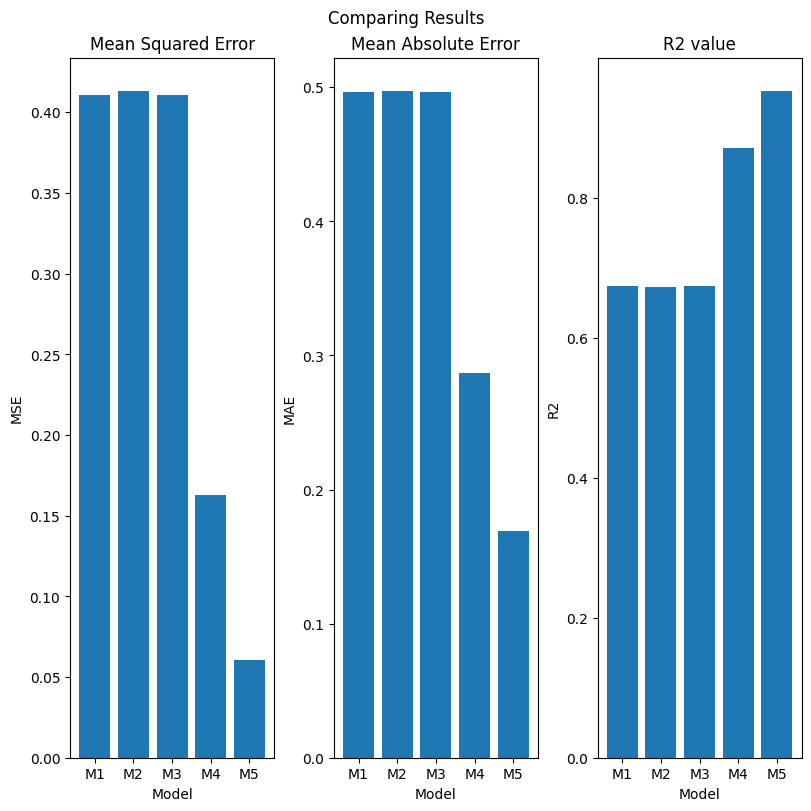

In [ ]:
X_axis = ['M1', 'M2', 'M3', 'M4', 'M5']

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(8,8), layout='constrained')
fig.suptitle("Comparing Results")


axes[0].bar(X_axis, MSE)
axes[0].set_xlabel("Model")
axes[0].set_ylabel("MSE")
axes[0].set_title("Mean Squared Error")

axes[1].bar(X_axis, MAE)
axes[1].set_xlabel("Model")
axes[1].set_ylabel("MAE")
axes[1].set_title("Mean Absolute Error")

axes[2].bar(X_axis, R2)
axes[2].set_xlabel("Model")
axes[2].set_ylabel("R2")
axes[2].set_title("R2 value")


plt.show

RESULT:

Clearly, XGBoost performs much better than all other models on all eval metrics.

# **Deployment:**
*Predicting and generating the outputs of the best selected model. Converting them into a CSV file.*


In [20]:
#prediction

y_pred = xgb_model.predict(X_test_scaled)

#evaluation

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error for XGB: {mse}")
print(f"Root Mean Squared Error for XGB: {rmse}")
print(f"Mean Absolute Error for XGB: {mae}")
print(f"R2 Score for XGB: {r2}")

Mean Squared Error for XGB: 0.06076480814312627
Root Mean Squared Error for XGB: 0.24650518887667713
Mean Absolute Error for XGB: 0.16906295198014026
R2 Score for XGB: 0.9518690370952932


In [21]:
result_data = pd.DataFrame()

result_data['% Silica Concentrate (Actual)'] = y_test
result_data['% Silica Concentrate (Predicted)'] = y_pred

result_data.to_excel('silica_predictions.xlsx', index=False)

In [23]:
from google.colab import files
files.download('silica_predictions.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
#Overview of the predictions.

print(result_data.head(20))

        % Silica Concentrate (Actual)  % Silica Concentrate (Predicted)
125925                       4.900000                          4.518604
258592                       1.490000                          1.457424
695481                       1.260000                          1.362608
727423                       1.980000                          2.069306
443007                       2.200000                          2.212183
1518                         1.730000                          1.651503
251876                       2.320000                          2.254385
267155                       1.840000                          1.775708
235001                       1.550000                          1.772347
16642                        3.880000                          3.814141
81072                        1.550000                          1.494049
48450                        5.310838                          4.540973
192516                       4.480000                          4

# **Project Summmarization:**



*   The **objective** of the project was to **predict % silica concentration in the input iron ore concentrate.**
*   The XGBoost model was selected as the model best fit for this prediction with Root mean square error of 0.246 and R Square value equal to 0.951.

*   This model can **help the engineers**, giving them early information to take actions. Hence, they will be able to **take corrective actions in advance** (reduce impurity, if it is the case) and **also help the environment** (reducing the amount of ore that goes to tailings as you reduce silica in the ore concentrate).







